# DATA ANALYSIS ON IBDM DATASET

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [2]:
df = pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## DATA CLEANING

In [3]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [5]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [6]:
 #Checking for missing values 
missing_values = df.isnull().sum()
missing_values

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [7]:
# Calculating the percentage of missing values
missing_values_percent = (missing_values/len(df))*100
missing_values_percent

Poster_Link       0.0
Series_Title      0.0
Released_Year     0.0
Certificate      10.1
Runtime           0.0
Genre             0.0
IMDB_Rating       0.0
Overview          0.0
Meta_score       15.7
Director          0.0
Star1             0.0
Star2             0.0
Star3             0.0
Star4             0.0
No_of_Votes       0.0
Gross            16.9
dtype: float64

In [8]:
# Combining results for easier interpretation
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Values Percentage (%)': missing_values_percent
}).sort_values(by='Missing Values', ascending=False)

missing_info

,Missing Values,Missing Values Percentage (%)
Gross,169,16.9
Meta_score,157,15.7
Certificate,101,10.1
Poster_Link,0,0.0
Series_Title,0,0.0
Released_Year,0,0.0
Runtime,0,0.0
Genre,0,0.0
IMDB_Rating,0,0.0
Overview,0,0.0


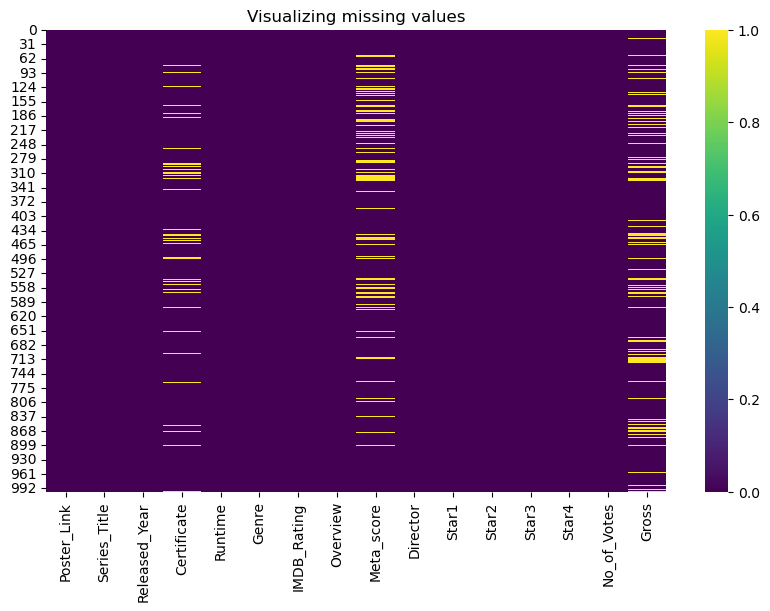

In [9]:
# Visualizing Missing Values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Visualizing missing values')
plt.show()

In [10]:
print(f'Before:', len(df))
df = df.drop_duplicates()
print(f'After:', len(df))

# This shows that there are no duplicate rows in the dataset

Before: 1000
After: 1000


In [11]:
# Converting the Gross earnings to numeric
df['Gross'] = df['Gross'].replace(',','',regex=True).astype('float')
df['Gross'].head()

0     28341469.0
1    134966411.0
2    534858444.0
3     57300000.0
4      4360000.0
Name: Gross, dtype: float64

In [12]:
# Converting released year to integer
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Released_Year'].head()

0    1994.0
1    1972.0
2    2008.0
3    1974.0
4    1957.0
Name: Released_Year, dtype: float64

In [13]:
# Converting runtime to integer
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(int)
df['Runtime'].head()

0    142
1    175
2    152
3    202
4     96
Name: Runtime, dtype: int32

## Descriptive Statistics And Visualization

In [14]:
# Descriptive Statistics
print(df[['IMDB_Rating', 'No_of_Votes', 'Gross']].describe())

       IMDB_Rating   No_of_Votes         Gross
count  1000.000000  1.000000e+03  8.310000e+02
mean      7.949300  2.736929e+05  6.803475e+07
std       0.275491  3.273727e+05  1.097500e+08
min       7.600000  2.508800e+04  1.305000e+03
25%       7.700000  5.552625e+04  3.253559e+06
50%       7.900000  1.385485e+05  2.353089e+07
75%       8.100000  3.741612e+05  8.075089e+07
max       9.300000  2.343110e+06  9.366622e+08


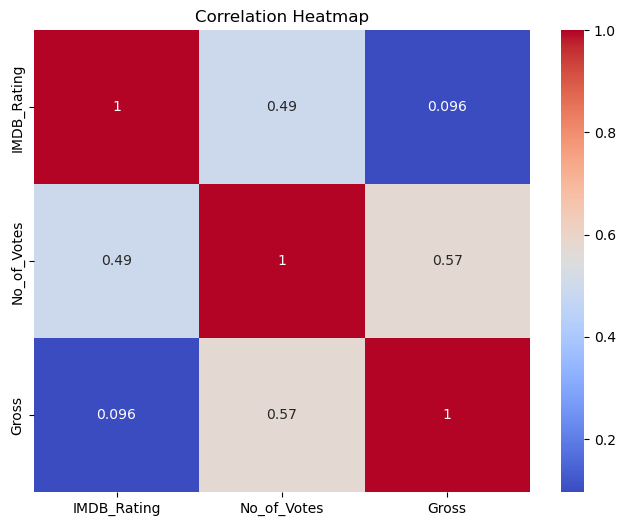

In [15]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['IMDB_Rating', 'No_of_Votes', 'Gross']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

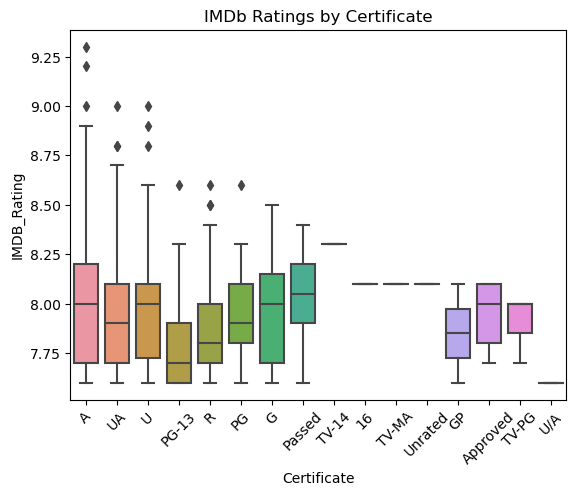

In [16]:
# Distribution of IMDb Ratings by Certificate
sns.boxplot(x='Certificate', y='IMDB_Rating', data=df)
plt.xticks(rotation=45)
plt.title('IMDb Ratings by Certificate')
plt.show()

## Visualizing Data To Get Insights

In [17]:
# Top 10 genres by frequency
print(df['Genre'].value_counts().head(10))

Genre
Drama                           85
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
Biography, Drama, History       28
Crime, Drama, Thriller          28
Crime, Drama, Mystery           27
Crime, Drama                    26
Animation, Adventure, Comedy    24
Name: count, dtype: int64


In [18]:
# IBDM rating across genres
top_genres = df.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)
print(top_genres)

Genre
Animation, Drama, War           8.50
Drama, Musical                  8.40
Action, Sci-Fi                  8.40
Drama, Mystery, War             8.35
Western                         8.35
Crime, Drama, Music             8.30
Mystery, Romance, Thriller      8.30
Adventure, Mystery, Thriller    8.30
Drama, Fantasy, Horror          8.30
Comedy, Musical, Romance        8.30
Name: IMDB_Rating, dtype: float64


In [19]:
# Top 5 directors by average IMDb Rating
top_directors = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(5)
print(top_directors)

Director
Frank Darabont     8.95
Irvin Kershner     8.70
Lana Wachowski     8.70
George Lucas       8.60
Roberto Benigni    8.60
Name: IMDB_Rating, dtype: float64


In [20]:
# Calculate skewness and kurtosis for each numerical column
for col in numerical_columns:
    col_skewness = skew(df[col].dropna())
    col_kurtosis = kurtosis(df[col].dropna())
    
    print(f"{col}:")
    print(f"  Skewness: {col_skewness:.2f}")
    print(f"  Kurtosis: {col_kurtosis:.2f}\n")

NameError: name 'numerical_columns' is not defined

In [ ]:
# Detecting Outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"{column} - Outliers: {len(outliers)}")
    print(outliers[[column]].head(), "\n")

In [ ]:
# Apply the function to numerical columns
for col in numerical_columns:
    detect_outliers(df, col)

In [ ]:
# Shows which genres dominate the highest rated movies
top_20_movies = df.nlargest(20, 'IMDB_Rating')

plt.figure(figsize=(16, 6))
sns.barplot(y='Genre', x='IMDB_Rating', data=top_20_movies, palette='muted')
plt.title('IMDb Ratings by Genre (Top 20 Movies)', fontsize=16)
plt.xlabel('IMDb Rating')
plt.ylabel('Genre')
plt.show()

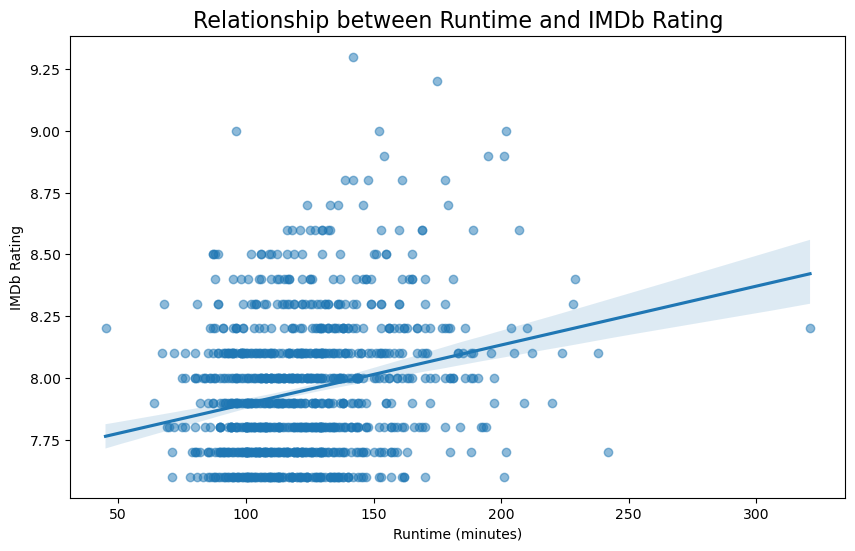

In [21]:
# Runtime vs IMDB Ratings
plt.figure(figsize=(10, 6))
sns.regplot(x='Runtime', y='IMDB_Rating', data=df, scatter_kws={'alpha':0.5})
plt.title('Relationship between Runtime and IMDb Rating', fontsize=16)
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.show()

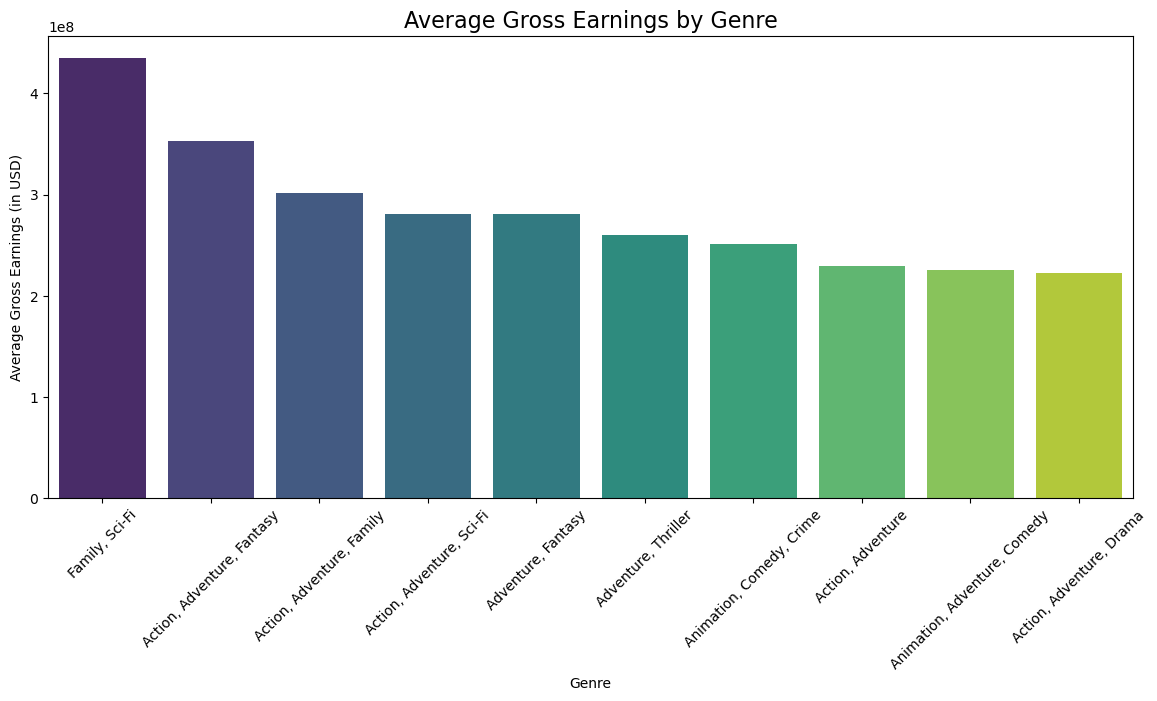

In [22]:
# Gross Earnings by Genre
gross_by_genre = df.groupby('Genre')['Gross'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=gross_by_genre.index, y=gross_by_genre.values, palette='viridis')
plt.title('Average Gross Earnings by Genre', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Average Gross Earnings (in USD)')
plt.xticks(rotation=45)
plt.show()

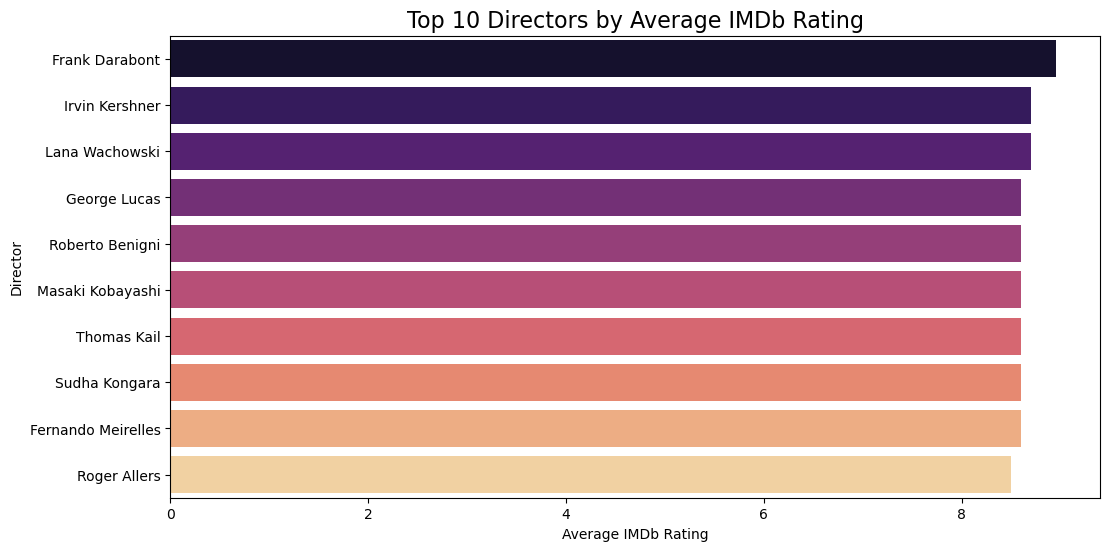

In [23]:
# Shows top 10 directors by average IMDb rating
top_directors = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Directors by Average IMDb Rating', fontsize=16)
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.show()

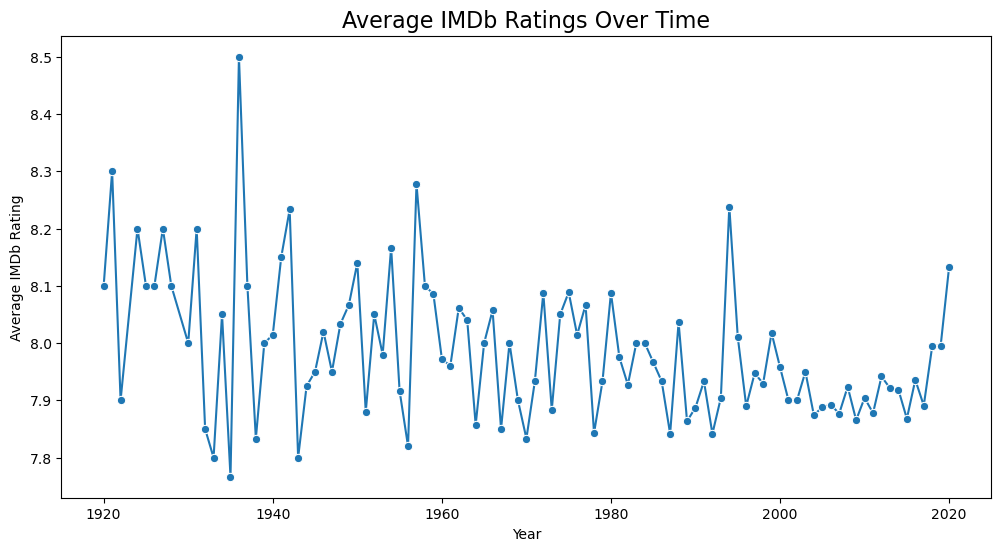

In [24]:
# IMDB Ratings Overtime
ratings_by_year = df.groupby('Released_Year')['IMDB_Rating'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=ratings_by_year.index, y=ratings_by_year.values, marker='o')
plt.title('Average IMDb Ratings Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.show()

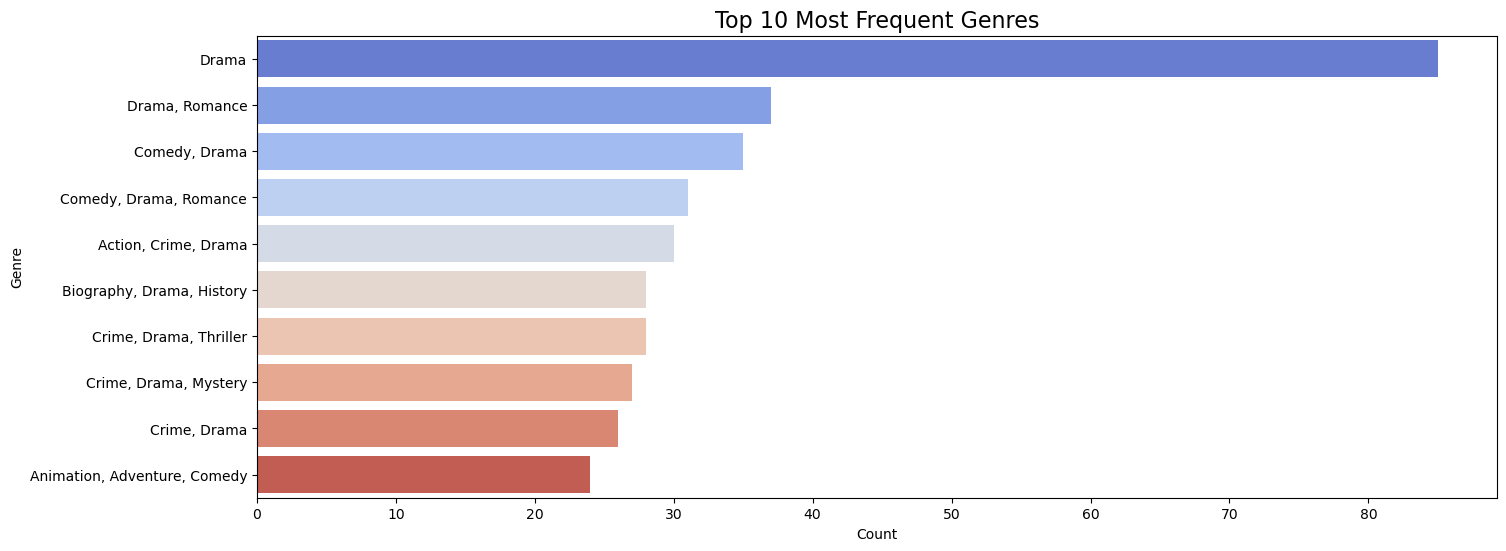

In [25]:
top_10_genres = df['Genre'].value_counts().head(10).reset_index()
top_10_genres.columns = ['Genre', 'Count']

# Create a bar plot for the top 10 genres
plt.figure(figsize=(16, 6))
sns.barplot(x='Count', y='Genre', data=top_10_genres, palette='coolwarm')
plt.title('Top 10 Most Frequent Genres', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

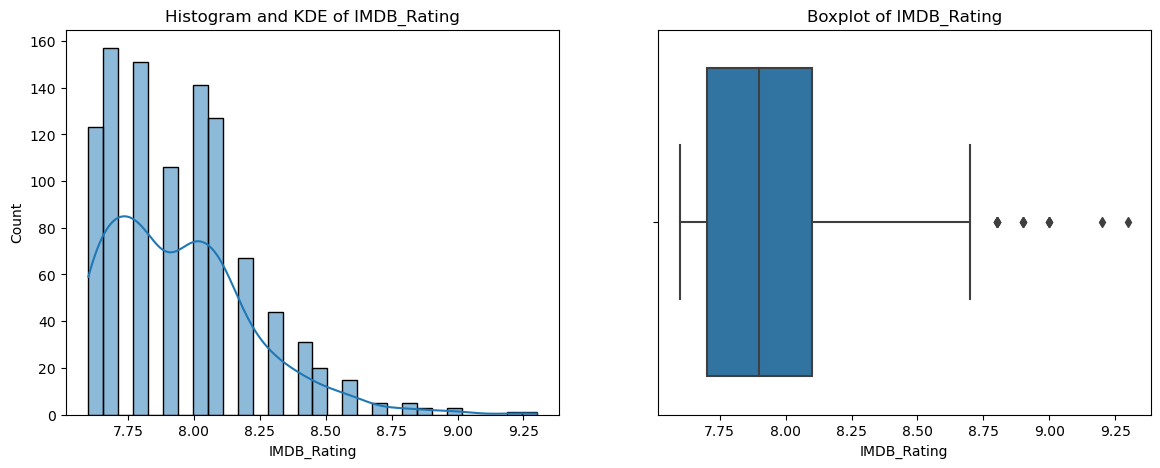

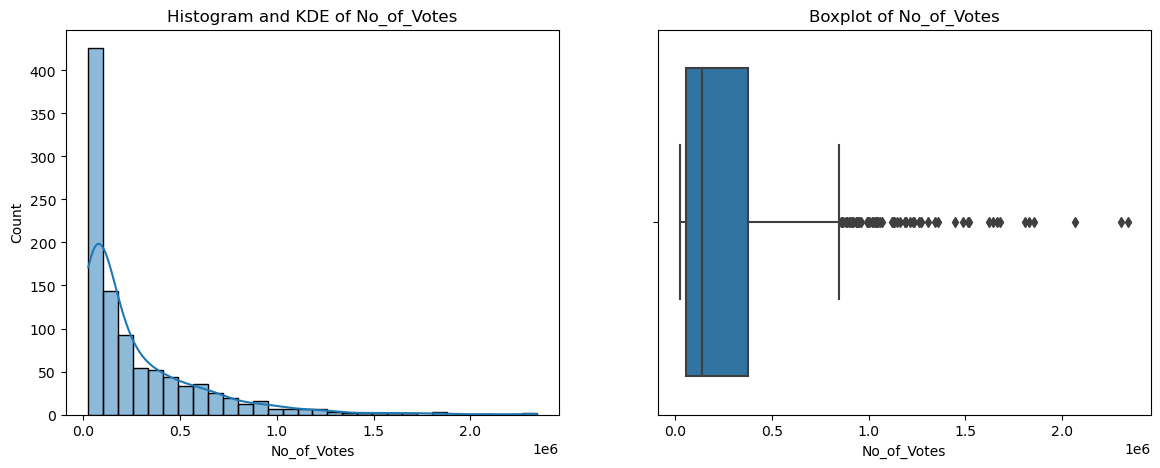

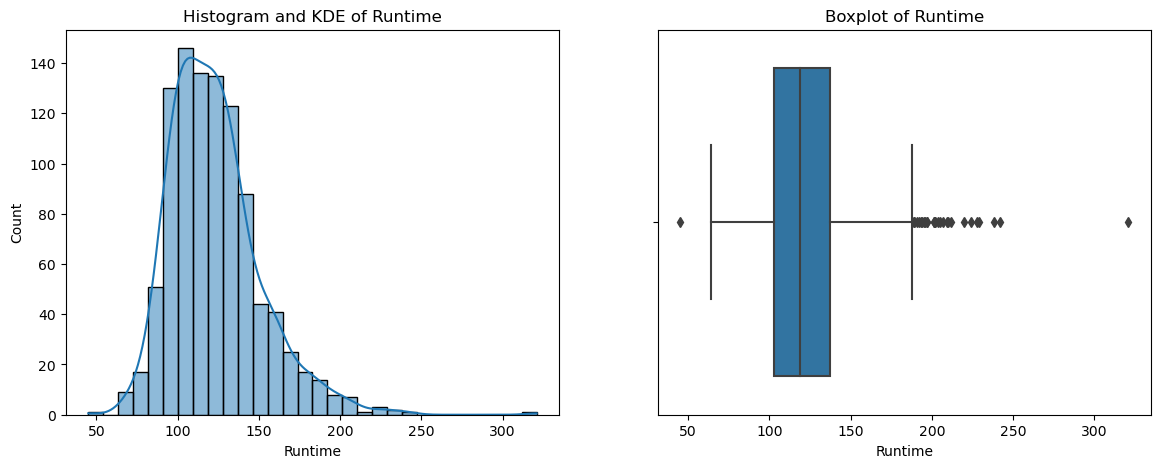

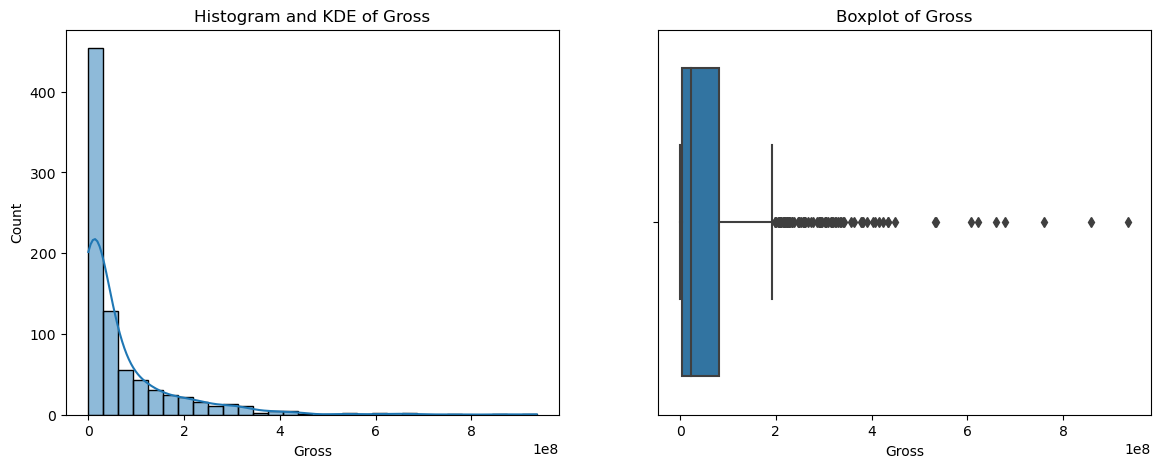

In [26]:
# Visualizing Distributions

numerical_columns = ['IMDB_Rating', 'No_of_Votes', 'Runtime', 'Gross']

# Plotting histograms and boxplots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(14, 5))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram and KDE of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()